In [2]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
train_path =r'Handbags Classification/Train Dataset'
val_path =r'Handbags Classification/Valid Dataset'

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255, horizontal_flip=True, shear_range=0.2, zoom_range=0.2)
train_generator = train_datagen.flow_from_directory(
    train_path,
    batch_size=32, 
    class_mode='categorical',
    target_size=(150,150)
)

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    batch_size=32, 
    class_mode='categorical',
    target_size=(150,150)
)

Found 2749 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [5]:
image, label = train_generator.next()

In [6]:
labels = ['Backpack Min Bag', 'Belt Bag', 'Duffle Bag', 'Shoulder Bag',
       'Tote Bag']

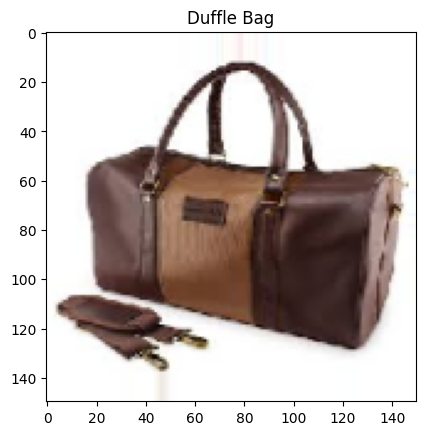

In [7]:
data = 3
plt.imshow(image[data])
plt.title(labels[tf.argmax(label[data])])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(5, activation='softmax')

])

In [10]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation = 'relu', input_dim = 784), 
#     tf.keras.layers.Dense(256, activation = 'relu'),
#     tf.keras.layers.Dense(124, activation = 'relu'),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 11,216,133
Trainable params: 11,216,133
Non-trainable params: 0
__________________________________________

In [13]:
model.compile(
    optimizer= 'adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
## callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 1e-4): #akan berhenti apabila memenuhi
            self.model.stop_training = True
            
cb = myCallback()

In [15]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data = val_generator, callbacks = cb
)

Epoch 1/10
86/86 [==============================] - 62s 704ms/step - loss: 3.2750 - accuracy: 0.2859 - val_loss: 1.5367 - val_accuracy: 0.3540
Epoch 2/10
86/86 [==============================] - 56s 650ms/step - loss: 1.4065 - accuracy: 0.3987 - val_loss: 1.5537 - val_accuracy: 0.3700
Epoch 3/10
86/86 [==============================] - 56s 647ms/step - loss: 1.2805 - accuracy: 0.4656 - val_loss: 1.5515 - val_accuracy: 0.3740
Epoch 4/10
86/86 [==============================] - 56s 649ms/step - loss: 1.2185 - accuracy: 0.4991 - val_loss: 1.5849 - val_accuracy: 0.3800
Epoch 5/10
86/86 [==============================] - 58s 677ms/step - loss: 1.1465 - accuracy: 0.5624 - val_loss: 1.5804 - val_accuracy: 0.4220
Epoch 6/10
86/86 [==============================] - 56s 650ms/step - loss: 1.1236 - accuracy: 0.5671 - val_loss: 1.4988 - val_accuracy: 0.3940
Epoch 7/10
86/86 [==============================] - 55s 639ms/step - loss: 1.0500 - accuracy: 0.5966 - val_loss: 1.4969 - val_accuracy: 0.4580

In [16]:
#train
y_acctrain = history.history['accuracy']
y_accval = history.history['val_accuracy']

#validation
y_losstrain = history.history['loss']
y_lossval = history.history['val_loss']

#epoch
x_ = range(len(y_acctrain))

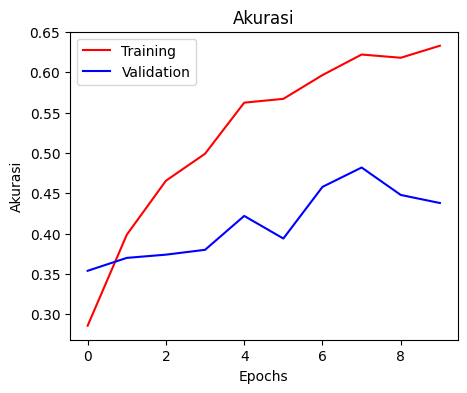

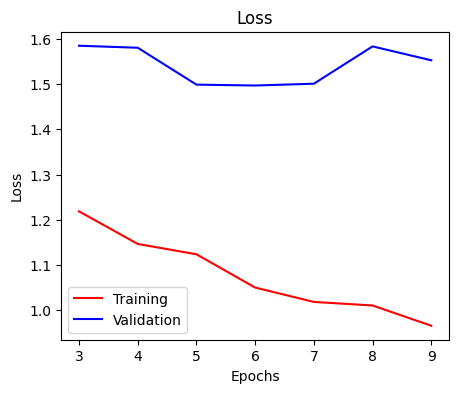

In [17]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acctrain, c='r', label='Training')
plt.plot(x_, y_accval, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_losstrain[3:], c='r', label='Training')
plt.plot(x_[3:], y_lossval[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model.evaluate(val_generator)

16/16 [==============================] - 4s 212ms/step - loss: 3.0836 - accuracy: 0.5400


[3.083564043045044, 0.5400000214576721]

In [15]:
result = model.predict(val_generator)
print(result)

16/16 [==============================] - 4s 200ms/step
[[1.7855466e-04 2.0968325e-02 9.7884881e-01 3.0461849e-06 1.2944224e-06]
 [3.4864068e-02 1.0306550e-16 9.6513587e-01 7.4546769e-09 1.2288917e-13]
 [9.3927848e-01 3.8332790e-05 1.1306417e-02 4.9376652e-02 4.2878615e-10]
 ...
 [3.0235201e-02 5.0028991e-03 9.5598501e-01 7.6439381e-03 1.1329246e-03]
 [9.7437727e-01 2.1367924e-02 1.6948123e-03 2.4445723e-03 1.1529719e-04]
 [3.5966149e-01 7.6928496e-04 7.4276741e-06 2.9746002e-02 6.0981584e-01]]


In [17]:
model.save('model1.h5')